##### `Download image:`

In [1]:
!wget https://eeweb.engineering.nyu.edu/~yao/EL5123/image/lena_gray.bmp

--2023-10-27 19:45:32--  https://eeweb.engineering.nyu.edu/~yao/EL5123/image/lena_gray.bmp
Resolving eeweb.engineering.nyu.edu (eeweb.engineering.nyu.edu)... 128.238.64.104
Connecting to eeweb.engineering.nyu.edu (eeweb.engineering.nyu.edu)|128.238.64.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263224 (257K) [image/bmp]
Saving to: ‘lena_gray.bmp.1’

lena_gray.bmp.1     100%[===================>] 257.05K  --.-KB/s    in 0.09s   

2023-10-27 19:45:32 (2.89 MB/s) - ‘lena_gray.bmp.1’ saved [263224/263224]



In [2]:
!ls

 Digital-Image-Processing-4E.pdf   HW1.pdf      Lect05.pdf   lecture-01.pdf
 ECE-T580-Syllabus.pdf		   Lect02.pdf   Lect06.pdf   lena_gray.bmp
 homework-1.ipynb		   Lect03.pdf   Lect07.pdf   lena_gray.bmp.1
'HW1-Kim Huy Heng'		   Lect04.pdf   Lect08.pdf   lena_gray.png


##### `Essential Packages:`

In [1]:
from skimage import io, color
from PIL import Image
import cv2 # OpenCV

import matplotlib.pyplot as plt
import numpy as np

##### `Visualize Image:`

The shape of image is (512, 512), and the visualization is given below.


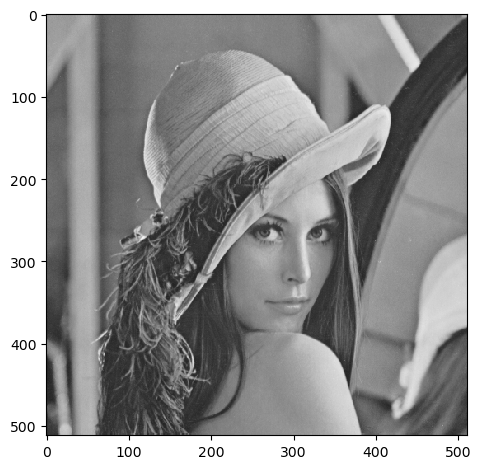

In [6]:
def showImage(filename):
    '''
    arg: filename (string)
    return: None
    '''
    img = io.imread('lena_gray.png')
    io.imshow(img)
    
    print(f'The shape of image is {img.shape}, and the visualization is given below.')
#end-def

filename = 'lena_gray.bmp'
showImage(filename)

##### convert image `.bmp` into `.png`

In [7]:
inputImagePath  = "lena_gray.bmp"
outputImagePath = "lena_gray.png"

try:
    img = Image.open(inputImagePath)

    # Save the image as a PNG file
    img.save(outputImagePath, "PNG")
    print(f'The .bmp image is successfully converted into .png, which is saved as {outputImagePath}')

except IOError:
    print(f'Unable to convert the image. Please check the input file.')

The .bmp image is successfully converted into .png, which is saved as lena_gray.png


##### `conversion RGB to Gray`

It is already in gray. Thus, conversion is not required.


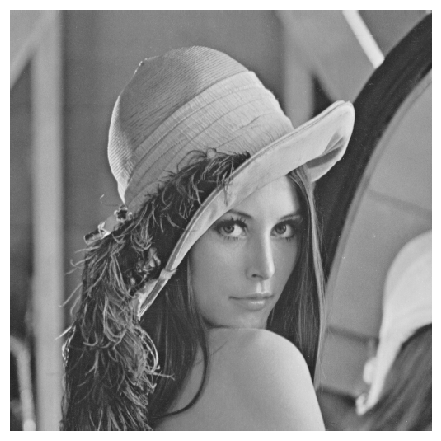

In [8]:
def rgbToGray(filename):
    '''
    Thanks: https://scikit-image.org/docs/stable/user_guide/geometrical_transform.html
    '''
    image = io.imread(filename)
    
    if len(image.shape) > 2:
        print('It is an RGB image.')
        image = color.rgb2gray(image)
    else:
        print('It is already in gray. Thus, conversion is not required.')
    
    return image
#end-def

filename = 'lena_gray.png'
image = rgbToGray(filename)
io.imshow(image)
plt.axis('off') # <matplotlib.image.AxesImage at 0x7fbb40a662c0>
plt.show()

In [9]:
filename = 'lena_gray.png'
img = io.imread(filename)

w = np.array([
    [0,  1/2, 0],
    [1/2, -1, 1/2],
    [0,  1/2, 0]
])

##### `Problem-1:`

In [2]:
def filtering(inputImage, outputImage):
    '''
    Thanks: https://learnopencv.com/image-filtering-using-convolution-in-opencv/
    
    args:
        inputImage: string
        outputImage: string
    return:
        None
    '''
    image = cv2.imread(inputImage)
    
    kernel = np.array([
        [0,  1/2, 0],
        [1/2, -1, 1/2],
        [0,  1/2, 0]
    ])
    
    # identity
    afterFilteringImage = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    
    # cv2.imshow('Original', image)
    # cv2.imshow('Identity', afterFilteringImage)
    
    # filename: string
    cv2.imwrite(outputImage, afterFilteringImage)
    print(f"w_filtered image saved as {outputImage}")
    
    # cv2.waitKey(1000)
    # cv2.destroyAllWindows()
#end-def
filename = 'lena_gray.png'

outputImage = filename.split('.')[0] + '_filter_g.png'
# print(outputImage)

# original = f(x, y)
# g(x, y) = f(x, y) ∗ w (x, y)
filtering(filename, outputImage)

# h(x, y) = g(x, y) ∗ w (x, y)
filename = 'lena_gray_filter_g.png'
outputImage = 'lena_gray_filter_h.png'
filtering(filename, outputImage)

QObject::moveToThread: Current thread (0x18dd7b0) is not the object's thread (0x225db90).
Cannot move to target thread (0x18dd7b0)

QObject::moveToThread: Current thread (0x18dd7b0) is not the object's thread (0x225db90).
Cannot move to target thread (0x18dd7b0)

QObject::moveToThread: Current thread (0x18dd7b0) is not the object's thread (0x225db90).
Cannot move to target thread (0x18dd7b0)

QObject::moveToThread: Current thread (0x18dd7b0) is not the object's thread (0x225db90).
Cannot move to target thread (0x18dd7b0)

QObject::moveToThread: Current thread (0x18dd7b0) is not the object's thread (0x225db90).
Cannot move to target thread (0x18dd7b0)

QObject::moveToThread: Current thread (0x18dd7b0) is not the object's thread (0x225db90).
Cannot move to target thread (0x18dd7b0)

QObject::moveToThread: Current thread (0x18dd7b0) is not the object's thread (0x225db90).
Cannot move to target thread (0x18dd7b0)

QObject::moveToThread: Current thread (0x18dd7b0) is not the object's thread

w_filtered image saved as lena_gray_filter_g.png
w_filtered image saved as lena_gray_filter_h.png


In [8]:
def imageDifference(image1, image2, outputImage):
    # Load the two images
    image1 = cv2.imread(image1)
    image2 = cv2.imread(image2)

    # Ensure the images have the same dimensions
    image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

    # Calculate the absolute difference between the two images
    difference = cv2.absdiff(image1, image2)
    
    cv2.imwrite(outputImage, difference)
    
    # Display the difference image
    # cv2.imshow("Difference Image", difference)
#end-def

In [3]:
image1 = 'lena_gray.png'
image2 = 'lena_gray_filter_g.png'

outputImage = 'lena_gray_filter_s.png'
imageDifference(image1, image2, outputImage)

QObject::moveToThread: Current thread (0x2690680) is not the object's thread (0x2b3aca0).
Cannot move to target thread (0x2690680)

QObject::moveToThread: Current thread (0x2690680) is not the object's thread (0x2b3aca0).
Cannot move to target thread (0x2690680)

QObject::moveToThread: Current thread (0x2690680) is not the object's thread (0x2b3aca0).
Cannot move to target thread (0x2690680)

QObject::moveToThread: Current thread (0x2690680) is not the object's thread (0x2b3aca0).
Cannot move to target thread (0x2690680)

QObject::moveToThread: Current thread (0x2690680) is not the object's thread (0x2b3aca0).
Cannot move to target thread (0x2690680)

QObject::moveToThread: Current thread (0x2690680) is not the object's thread (0x2b3aca0).
Cannot move to target thread (0x2690680)

QObject::moveToThread: Current thread (0x2690680) is not the object's thread (0x2b3aca0).
Cannot move to target thread (0x2690680)

QObject::moveToThread: Current thread (0x2690680) is not the object's thread

In [4]:
image1 = 'lena_gray.png'
image2 = 'lena_gray_filter_h.png'

outputImage = 'lena_gray_filter_r.png'
imageDifference(image1, image2, outputImage)

QObject::moveToThread: Current thread (0x2a6abf0) is not the object's thread (0x2a72940).
Cannot move to target thread (0x2a6abf0)

QObject::moveToThread: Current thread (0x2a6abf0) is not the object's thread (0x2a72940).
Cannot move to target thread (0x2a6abf0)

QObject::moveToThread: Current thread (0x2a6abf0) is not the object's thread (0x2a72940).
Cannot move to target thread (0x2a6abf0)

QObject::moveToThread: Current thread (0x2a6abf0) is not the object's thread (0x2a72940).
Cannot move to target thread (0x2a6abf0)

QObject::moveToThread: Current thread (0x2a6abf0) is not the object's thread (0x2a72940).
Cannot move to target thread (0x2a6abf0)

QObject::moveToThread: Current thread (0x2a6abf0) is not the object's thread (0x2a72940).
Cannot move to target thread (0x2a6abf0)

QObject::moveToThread: Current thread (0x2a6abf0) is not the object's thread (0x2a72940).
Cannot move to target thread (0x2a6abf0)

QObject::moveToThread: Current thread (0x2a6abf0) is not the object's thread

##### Problem -2 `Laplacian filter`

In [9]:
def laplacianFilter(inputImage, outputImage):
    
    image = cv2.imread(inputImage)

    kernel = np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ]) 
    
    laplacianImage = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    
    cv2.imwrite(outputImage, laplacianImage)
    
    print(f"Employing Laplacian Filter, which saved as {outputImage}")
#end-def

In [10]:
laplacianFilter('lena_gray.png', 'lena_gray_Laplacian.png')

Employing Laplacian Filter, which saved as lena_gray_Laplacian.png


In [4]:
image1 = 'lena_gray.png'
image2 = 'lena_gray_Laplacian.png'

outputImage = 'lena_gray_LaplacianDiff.png'
imageDifference(image1, image2, outputImage)

QObject::moveToThread: Current thread (0xa53e80) is not the object's thread (0x2154300).
Cannot move to target thread (0xa53e80)

QObject::moveToThread: Current thread (0xa53e80) is not the object's thread (0x2154300).
Cannot move to target thread (0xa53e80)

QObject::moveToThread: Current thread (0xa53e80) is not the object's thread (0x2154300).
Cannot move to target thread (0xa53e80)

QObject::moveToThread: Current thread (0xa53e80) is not the object's thread (0x2154300).
Cannot move to target thread (0xa53e80)

QObject::moveToThread: Current thread (0xa53e80) is not the object's thread (0x2154300).
Cannot move to target thread (0xa53e80)

QObject::moveToThread: Current thread (0xa53e80) is not the object's thread (0x2154300).
Cannot move to target thread (0xa53e80)

QObject::moveToThread: Current thread (0xa53e80) is not the object's thread (0x2154300).
Cannot move to target thread (0xa53e80)

QObject::moveToThread: Current thread (0xa53e80) is not the object's thread (0x2154300).
C

##### Problem-3: Unshaped Masking:

In [6]:
def unsharpedMasking(inputImage, outputImage):
    '''
    Thanks: https://stackoverflow.com/questions/32454613/python-unsharp-mask
    '''
    image = cv2.imread(inputImage)
    
    # We are given that the unsharp masking using the 5×5, σ2= 100 Gaussian filter.
    image = cv2.GaussianBlur(image, (5, 5), sigmaX=10, sigmaY=0)
    
    cv2.imwrite(outputImage, image)
    
    print(f"Uing Unsharped masking filtered, which is saved as {outputImage}")
#end-def

In [7]:
unsharpedMasking('lena_gray.png', 'lena_gray_Unsharp.png')

Uing Unsharped masking filtered, which is saved as lena_gray_Unsharp.png


In [9]:
image1 = 'lena_gray.png'
image2 = 'lena_gray_Unsharp.png'

outputImage = 'lena_gray_UnsharpDiff.png'
imageDifference(image1, image2, outputImage)

##### Problem-4:

In [10]:
def avgerageFilter(inputImage, outputImage):
    '''
    Thanks: https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
    '''
    image = cv2.imread(inputImage)
    
    kernel = np.ones((3,3),np.float32)/9.0
    
    afterFilteringImage = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    
    cv2.imwrite(outputImage, afterFilteringImage)
    
    print(f"Average filtered 3x3; {outputImage}")
    
#end-def

In [11]:
avgerageFilter('lena_gray.png', 'lena_gray_average.png')

Average filtered 3x3; lena_gray_average.png


In [ ]:
avgerageFilter('lena_gray.png', 'lena_gray_average.png')

In [12]:
def laplacianFilter4(inputImage, outputImage):
    
    image = cv2.imread(inputImage)

    kernel = np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ])
    
    laplacianImage = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    
    cv2.imwrite(outputImage, laplacianImage)
    
    print(f"Employing Laplacian Filter in Average Filtered Image, which saved as {outputImage}")
#end-def

In [14]:
laplacianFilter4('lena_gray_average.png', 'lena_gray_AvgLaplace.png')

# filenameAvgLaplaceDiff.jpg

Employing Laplacian Filter in Average Filtered Image, which saved as lena_gray_AvgLaplace.png


In [15]:
imageDifference('lena_gray_average.png', 'lena_gray_AvgLaplace.png', 'lena_gray_AvgLaplaceDiff.png')

In [16]:
!ls *.png

filenameAvgLaplace.png	      lena_gray_filter_s.png
lena_gray_average.png	      lena_gray_LaplacianDiff.png
lena_gray_AvgLaplaceDiff.png  lena_gray_Laplacian.png
lena_gray_AvgLaplace.png      lena_gray.png
lena_gray_filter_g.png	      lena_gray_UnsharpDiff.png
lena_gray_filter_h.png	      lena_gray_Unsharp.png
lena_gray_filter_r.png
